#### authors: Rafael Dousse, Eva Ray, Massimo Stefani

# Exercice 1 - Digit classification system using different SVM classifiers

## Imports

In [33]:
import gzip
import _pickle as cPickle

# Add your imports here
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

## Exercise's steps

The objective of this exercise is to build a classification system able to classify the images of handwritten digits (0–9) coming from the MNIST database and using SVM with different types of kernels (linear, polynomial, RBF, ...). For that purpose, you will use the SVM library available in [_Scikit-learn_](http://scikit-learn.org).

### a. Getting the training and test sample sets from the MNIST database

#### a) Load MNIST digit dataset

In [2]:
# Load training, validation (not used in the PW) and test datasets
with gzip.open("mnist.pkl.gz", "rb") as f:
    train_set, valid_set, test_set = cPickle.load(f, encoding="latin1")

# Print the shape of the various datasets
print("Training set:", len(train_set[0]))
print("Validation set:", len(valid_set[0]))
print("Test set:", len(test_set[0]))

Training set: 50000
Validation set: 10000
Test set: 10000


#### b) Visualize (plot) the images of some digits of the MNIST database

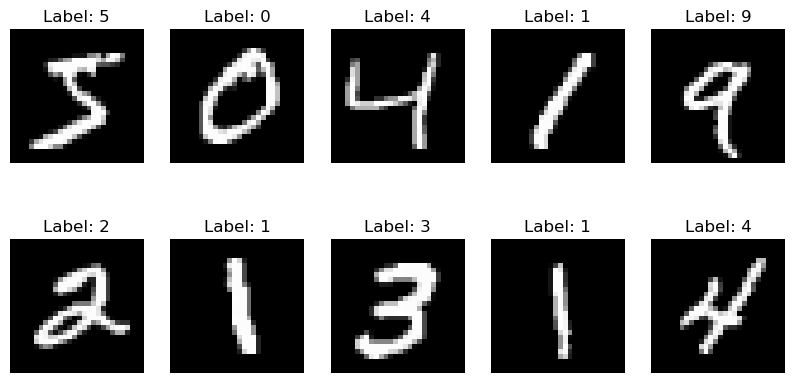

In [18]:
X_train, y_train = train_set

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray') # Reshape to 28x28 for visualization
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


#### c) Build the final training and test sets, which should be balanced

In [30]:
X_test, y_test = test_set

In [31]:
# Analyze the distribution of digit classes in the training and test sets to choose the number of
# samples per class

train_counter = Counter(y_train)
test_counter = Counter(y_test)

classes = sorted(set(train_counter.keys()) | set(test_counter.keys()))

print(f"{'Classe':>6}  {'Train':>6}  {'Test':>6}")
print("-" * 26)
for cls in classes:
    print(f"{cls:6}  {train_counter.get(cls, 0):6}  {test_counter.get(cls, 0):6}")


Classe   Train    Test
--------------------------
     0    4932     980
     1    5678    1135
     2    4968    1032
     3    5101    1010
     4    4859     982
     5    4506     892
     6    4951     958
     7    5175    1028
     8    4842     974
     9    4988    1009


In [43]:
# We wanted to choose the biggest number of samples per class possible to have balanced datasets and 30% -70% train-test split but the training took too long so we reduced the number of samples per class.

nb_train = 280 # 70%
nb_test = 120 # 30%

X_train_balanced = []
y_train_balanced = []
X_test_balanced = []
y_test_balanced = []

for cls in classes:
    # Get indices of samples belonging to the current class
    train_indices = np.where(y_train == cls)[0][:nb_train]
    test_indices = np.where(y_test == cls)[0][:nb_test]

    # shuffle the indices to ensure randomness
    np.random.shuffle(train_indices)
    np.random.shuffle(test_indices)

    # Append the selected samples to the balanced datasets
    X_train_balanced.append(X_train[train_indices])
    y_train_balanced.append(y_train[train_indices])
    X_test_balanced.append(X_test[test_indices])
    y_test_balanced.append(y_test[test_indices])

# Stack the lists into numpy arrays
X_train_balanced = np.vstack(X_train_balanced)
y_train_balanced = np.hstack(y_train_balanced)
X_test_balanced = np.vstack(X_test_balanced)
y_test_balanced = np.hstack(y_test_balanced)

print("Final shapes:")
print("X_train_balanced:", X_train_balanced.shape)
print("y_train_balanced:", np.bincount(y_train_balanced))
print("X_test_balanced:", X_test_balanced.shape)
print("y_test_balanced:", np.bincount(y_test_balanced))


Final shapes:
X_train_balanced: (2100, 784)
y_train_balanced: [210 210 210 210 210 210 210 210 210 210]
X_test_balanced: (900, 784)
y_test_balanced: [90 90 90 90 90 90 90 90 90 90]


### b. Classification of digits based on raw pixel values using SVM and different kernels

Create, train and test several SVM classifiers with different kernels (linear, polynomial, RBF, ...). For the training, perform a cross-validation using 10 folds, and test different with several $C$ and kernel parameter values (e.g. for $\gamma$ for RBF kernel) in order to get the best classifier. After the test, display the classification performances and confusion matrix of each SVM classifier (see class _metrics_).

Best parameters for linear kernel: {'C': 0.1, 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        90
           1       0.94      1.00      0.97        90
           2       0.86      0.90      0.88        90
           3       0.89      0.79      0.84        90
           4       0.89      0.88      0.88        90
           5       0.78      0.84      0.81        90
           6       0.93      0.89      0.91        90
           7       0.85      0.87      0.86        90
           8       0.91      0.74      0.82        90
           9       0.81      0.90      0.85        90

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900

Best cross-validation score: 0.9038095238095238


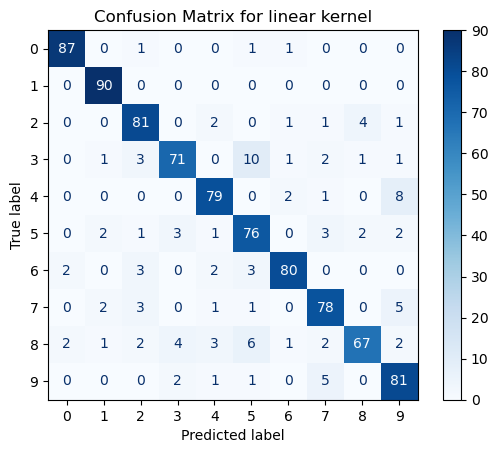

Best parameters for poly kernel: {'C': 0.1, 'coef0': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        90
           1       0.97      1.00      0.98        90
           2       0.92      0.92      0.92        90
           3       0.92      0.84      0.88        90
           4       0.87      0.90      0.89        90
           5       0.86      0.90      0.88        90
           6       0.93      0.92      0.93        90
           7       0.89      0.90      0.90        90
           8       0.91      0.82      0.87        90
           9       0.89      0.92      0.91        90

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900

Best cross-validation score: 0.9314285714285715


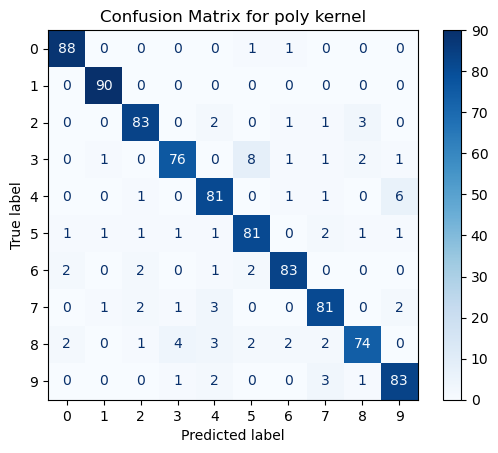

Best parameters for rbf kernel: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.97      1.00      0.98        90
           2       0.92      0.91      0.92        90
           3       0.94      0.87      0.90        90
           4       0.89      0.92      0.91        90
           5       0.86      0.91      0.89        90
           6       0.95      0.92      0.94        90
           7       0.91      0.90      0.91        90
           8       0.92      0.86      0.89        90
           9       0.88      0.93      0.91        90

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900

Best cross-validation score: 0.9323809523809524


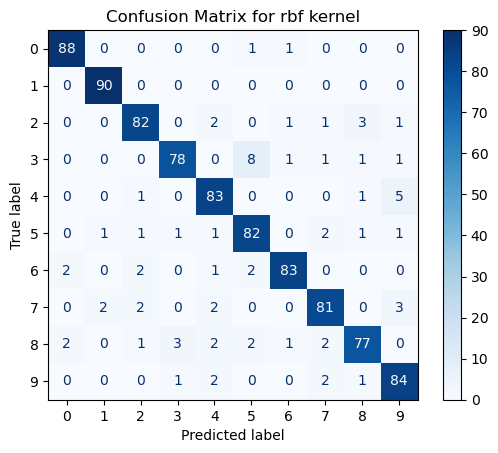

Best parameters for sigmoid kernel: {'C': 100, 'coef0': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        90
           1       0.94      1.00      0.97        90
           2       0.86      0.90      0.88        90
           3       0.89      0.79      0.84        90
           4       0.89      0.88      0.88        90
           5       0.77      0.84      0.80        90
           6       0.93      0.89      0.91        90
           7       0.85      0.87      0.86        90
           8       0.90      0.73      0.81        90
           9       0.81      0.90      0.85        90

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900

Best cross-validation score: 0.9066666666666666


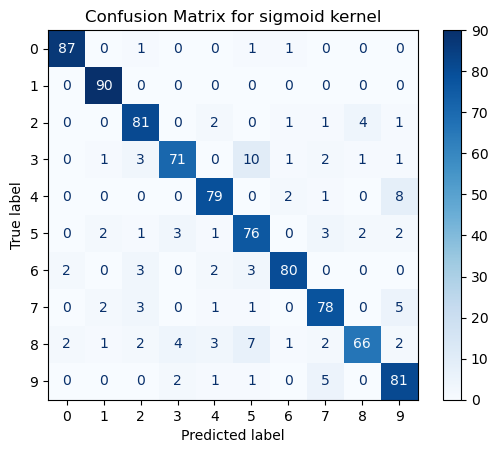

In [48]:
nb_folds = 10
c = [0.1, 1, 10, 100]
gamma = [0.1, 0.01, 0.001]

parameters = [
    {'kernel': ['linear'], 'C': c},
    {'kernel': ['poly'], 'C': c, 'degree': [2, 3], 'gamma': gamma, 'coef0': [0.0, 0.1]},
    {'kernel': ['rbf'], 'C': c, 'gamma': gamma},
    {'kernel': ['sigmoid'], 'C': c, 'gamma': gamma, 'coef0': [0.0, 0.1]}
]

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
best_classifier = None
best_score = 0

for param in parameters:
    svc = svm.SVC()
    # allows to give multiple parameters to test in GridSearchCV
    clf = GridSearchCV(svc, param, cv=nb_folds, n_jobs=-1)
    clf.fit(X_train_balanced, y_train_balanced)

    print(f"Best parameters for {param['kernel'][0]} kernel: {clf.best_params_}")

    y_pred = clf.predict(X_test_balanced)

    print("Classification Report:")
    print(classification_report(y_test_balanced, y_pred))
    print("Best cross-validation score:", clf.best_score_)

    ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred, display_labels=classes, cmap='Blues')
    plt.title(f"Confusion Matrix for {param['kernel'][0]} kernel")
    plt.show()

    if clf.best_score_ > best_score:
        best_score = clf.best_score_
        best_classifier = clf


### c. (Optional) Impact of preprocessing and feature extraction

Analyse the impact of the classification performances using the following preprocessing and feature extraction steps:

#### a) Preprocessing step: convert images to binary (i.e. black and white) representations 

In [6]:
# Your code here

#### b) Feature extraction steps:
* Horizontal and vertical projections (i.e. compute the sum of grey pixel values along the the X and Y-axis)
* Local binary patterns
* Any other usable image features that you may have found

In [7]:
# Your code here

### d. Analysis of the results

Analyse the results obtained with the best SVM classifier.

a) Which kernel and parameters were used?

_Your answer here_

b) Which digit classes are the best/worse recognized against which? Why?

_Your answer here_

c) What is the impact of the sizes of the training and test sets on the classification performance?

_Your answer here_